<h1><center><span style='color:Black'>Implementation of ANOVA Analysis Using Python </span></center></h1>

<h2><center style=color:red>Professor : Minkyu Kim</center></h2>

<b><center>Submitted by:<br>Tummeti Sai Kumar Reddy<br>Vakacharla Gnana Prasuna Nimeesha<br>Vanacharla Bhaskara Vijaya Sai Swamyr<br>Vutukuru Krishna Chaitanya<br>Yatham Rajesh</center></b>

# Abstract
+ This study investigates the impact of sensory restriction on psychopathic deviant T scores among subjects from Central Prison in Raleigh, NC. The experiment aimed to identify a treatment that could effectively reduce individuals' tendencies toward the need for control or rebellion against control, as measured by the Minnesota Multiphasic Personality Inventory (MMPI) test.
+ Exploratory Data Analysis (EDA) techniques were applied to understand the initial trends and variations in the data by generating box plots, while a One-Way Analysis of Variance (ANOVA) was employed to assess the significance of differences among the three treatment groups.
+ Generate the Null and Alternative Hypotheses for the provided data set. Descriptive statistics such as means, variances, standard deviations, and sum of squares will be computed to obtain F-test statistics. 
+ We Reject or accept the Null Hypothesis based on the F statistics. 
+ To reject the null hypothesis, the Bonferroni Correction Method will be employed for pairwise comparisons, to identify which treatment groups differ from each other.
+ The findings from this study contribute valuable insights into the potential efficacy of sensory restriction as a therapeutic approach for reducing psychopathic deviant T scores, with implications for the development of interventions within correctional settings.


# Theory

# Statistical test
+ In the context of conducting a statistical test, the test statistic serves as a numerical representation of how closely the distribution of observed data aligns with the expected distribution under the null hypothesis. Subsequently, the calculated test statistic is utilized in determining the p-value, or probability value, which, in turn, is instrumental in deciding whether to accept or reject the null hypothesis.
+ The presence of a statistically significant relationship between predictor and outcome variables is implied when the test statistic surpasses the value derived from the null hypothesis. This comparison serves as an indicator of the strength of the association between the variables.
+ Conversely, if the computed test statistic falls short of the extremeness observed in the null hypothesis, it suggests the absence of a statistically significant relationship between the predictor and outcome variables. This discrepancy emphasizes the importance of interpreting the test statistic in gauging the significance of the observed relationship.

# When to perform a statistical test?
+ Statistical analyses are employed when researchers pose specific research questions involving group comparisons, relationship assessments, or hypothesis testing.
+ The selection of a statistical test is contingent upon the nature of the data. For instance, ANOVA is suitable for scenarios with three or more groups, while t-tests are apt for comparing means between two groups.
+ A statistical test's validity hinges on the adequacy of the sample size, ensuring it is large enough to approximate the true distribution of the population under investigation.
+ The study's design, whether experimental or observational, dictates the choice of an appropriate statistical test. Experimental designs commonly utilize ANOVA or t-tests, whereas observational studies may employ correlation or regression. To determine the suitable statistical test:

    + It is imperative to confirm whether the data satisfies specific assumptions.
    + Consideration must be given to the types of variables under analysis (categorical, continuous, dependent, independent).

# Statistical Assumptions
Statistical tests rely on certain fundamental assumptions concerning the data under examination. These assumptions include:

1. **Normality:** Numerous statistical tests presuppose that the data conforms to a normal distribution. Deviations from this assumption can potentially undermine the dependability of the results.

2. **Independence:** The assumption of independence stipulates that observations within the dataset should be unrelated to each other. For instance, in a t-test, values within one group should not exhibit correlations with values in another group.

3. **Homogeneity of Variance:** Homogeneity assumes that the variances among the groups being compared are approximately equal. Violations of this assumption have the potential to impact the accuracy and reliability of the statistical test.


## Types of test statistics 
Below is a summary of the most common test statistics, their hypotheses, and the types of statistical tests that use them.

| Test Statistic | Null and Alternative Hypotheses |      Statistical Tests |
| :-: | :-: | :-: |
| t-value | Null: The means of two groups are equal <br />Alternative: The means of two groups are not equal |    T-test |
| z-value | Null: The means of two groups are equal <br />Alternative: The means of two groups are not equal |    Z-test |
| F-value | Null: The means of all groups are equal <br />Alternative: The means of atleast two groups are not equal |     ANOVA |

## ANOVA (Analysis of Variance) 
The Analysis of Variance, abbreviated as ANOVA, is a statistical procedure employed to assess the presence of significant differences among the means of three or more independent sets of continuous data. Introduced by Ronald Fisher in 1918, this test is frequently applied in experimental designs featuring multiple independent groups.

# One way and Two way ANOVA
+ One-way or two-way refers to the number of independent variables in the ANOVA test.
+ In one-way ANOVA, we assess the impact of a single factor on a response variable to determine if there are statistically significant differences among the means of three or more independent groups.
+ Two-way ANOVA (Analysis of Variance) is a statistical technique that extends the one-way ANOVA to assess the impact of two independent variables simultaneously on a dependent variable




<h3><center style=color:red>Exploratory Data Analysis</center></h3>                     

In [64]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlite3 import connect
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

In [46]:
import warnings 
warnings.filterwarnings('ignore')
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Create your connection.
db_connect = sqlite3.connect(r"C:\Users\nimee\Downloads\DSCI6002_prj1_data.db")
print(db_connect)

In [47]:
sql_query = """SELECT name FROM sqlite_master WHERE type = 'table' ; """
cursor = db_connect.cursor()

In [48]:
cursor.execute(sql_query)
print("List of tables\n")
print(cursor.fetchall())
df = pd.read_sql_query("SELECT * from prj1",db_connect)
df

List of tables

[('prj1',)]


,index,pre_trt1,post_trt1,pre_trt2,post_trt2,pre_trt3,post_trt3
0,0,67,74,88,79,86,90
1,1,86,50,79,81,53,53
2,2,64,64,67,83,81,102
3,3,69,76,83,74,69,67
4,4,67,64,79,76,81,76
5,5,79,81,76,69,76,81
6,6,67,74,71,71,74,69
7,7,67,50,67,75,60,60
8,8,69,60,69,64,67,69
9,9,57,57,67,64,86,83


The provided dataset includes both pre-treatment and post-treatment values of the results. However, for the analysis, it is imperative to compute the differences between the pre-treatment and post-treatment values of the tests, as this information is crucial for a thorough examination of the data.

In [49]:
df['diff_of_trt1'] =df['pre_trt1']- df['post_trt1'] 
df['diff_of_trt2'] =df['pre_trt2']- df['post_trt2'] 
df['diff_of_trt3'] =df['pre_trt3']- df['post_trt3'] 

df

,index,pre_trt1,post_trt1,pre_trt2,post_trt2,pre_trt3,post_trt3,diff_of_trt1,diff_of_trt2,diff_of_trt3
0,0,67,74,88,79,86,90,-7,9,-4
1,1,86,50,79,81,53,53,36,-2,0
2,2,64,64,67,83,81,102,0,-16,-21
3,3,69,76,83,74,69,67,-7,9,2
4,4,67,64,79,76,81,76,3,3,5
5,5,79,81,76,69,76,81,-2,7,-5
6,6,67,74,71,71,74,69,-7,0,5
7,7,67,50,67,75,60,60,17,-8,0
8,8,69,60,69,64,67,69,9,5,-2
9,9,57,57,67,64,86,83,0,3,3


In [50]:
df.drop(['pre_trt1','post_trt1','pre_trt2','post_trt2','pre_trt3','post_trt3'],axis=1)

,index,diff_of_trt1,diff_of_trt2,diff_of_trt3
0,0,-7,9,-4
1,1,36,-2,0
2,2,0,-16,-21
3,3,-7,9,2
4,4,3,3,5
5,5,-2,7,-5
6,6,-7,0,5
7,7,17,-8,0
8,8,9,5,-2
9,9,0,3,3


In [51]:
df['diff_of_trt1'].describe()

count    14.000000
mean      6.214286
std      12.298709
min      -7.000000
25%      -1.500000
50%       1.500000
75%      14.000000
max      36.000000
Name: diff_of_trt1, dtype: float64

In [52]:
df['diff_of_trt2'].describe()

count    14.000000
mean      2.857143
std       7.940714
min     -16.000000
25%       0.750000
50%       3.000000
75%       7.000000
max      17.000000
Name: diff_of_trt2, dtype: float64

In [53]:
df['diff_of_trt3'].describe()

count    14.000000
mean     -3.214286
std       8.568085
min     -21.000000
25%      -4.750000
50%       0.000000
75%       2.750000
max       5.000000
Name: diff_of_trt3, dtype: float64

<Axes: >

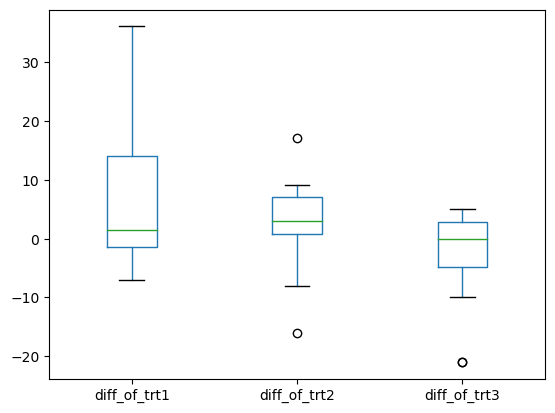

In [54]:
df.boxplot(column = ['diff_of_trt1', 'diff_of_trt2', 'diff_of_trt3'], grid=False)

A boxplot is a graphical representation used to display the spread and distribution of numerical data. It shows the range of the data, as well as the median and quartiles. The minimum and maximum values are represented by the whiskers, while the box itself represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). The line inside the box represents the median.

In this particular example, the boxplot displays the minimum, Q1, median, Q3, and maximum values of treatments. These values allow for a visual comparison of the distribution and spread of the data between these groups.

<center><h1>ANOVA Analysis Results & Explanation</h1><br><h2 style="color:red">one way ANOVA</h2></center>

In [55]:
d_melt = pd.melt(df.reset_index(),
                 id_vars = ['index'],
                 value_vars = ['diff_of_trt1', 'diff_of_trt2', 'diff_of_trt3'])
d_melt.columns = ['index', 'treatments','value']
d_melt

,index,treatments,value
0,0,diff_of_trt1,-7
1,1,diff_of_trt1,36
2,2,diff_of_trt1,0
3,3,diff_of_trt1,-7
4,4,diff_of_trt1,3
5,5,diff_of_trt1,-2
6,6,diff_of_trt1,-7
7,7,diff_of_trt1,17
8,8,diff_of_trt1,9
9,9,diff_of_trt1,0


In [56]:
## get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('value ~ C(treatments)', data=d_melt).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     3.334
Date:                Thu, 16 Nov 2023   Prob (F-statistic):             0.0461
Time:                        12:49:57   Log-Likelihood:                -153.87
No. Observations:                  42   AIC:                             313.7
Df Residuals:                      39   BIC:                             319.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         6.2143      2.617      2.374      0.023       0.920      11.508
C(treatments)[T.diff_of_trt2]    -3.3571      3.702     -0.907      0.370     -10.844       4.130
C(treatments)[T.diff_of_trt3]    -9.4286      3.702     -2.547      0.015     -16.916      -1.942
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   2.378
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.938
Skew:                           0.205   Prob(JB):                        0.380
Kurtosis:                       3.969   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Linear regression using Ordinary Least Squares (OLS) is a technique used to estimate unknown parameters by creating a model that minimizes the sum of squared errors between the observed data and the predicted values.


In [70]:
d_melt = d_melt.dropna()
d_melt

,index,treatments,value
0,0,diff_of_trt1,-7
1,1,diff_of_trt1,36
2,2,diff_of_trt1,0
3,3,diff_of_trt1,-7
4,4,diff_of_trt1,3
5,5,diff_of_trt1,-2
6,6,diff_of_trt1,-7
7,7,diff_of_trt1,17
8,8,diff_of_trt1,9
9,9,diff_of_trt1,0


* Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values. By default, this function returns a new DataFrame and the source DataFrame remains unchanged. We can create null values using None, pandas. NaT, and numpy.

* By using the dropna() method rows containing the null values are removed

In [71]:
d_melt.isna()

,index,treatments,value
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


* The isna() function is used to detect missing values
* It return a boolean same-sized object indicating if the values are NA.

In [57]:
# One Way Anova Model
def anova_model():
    anova_table = sm.stats.anova_lm(model,typ=2)
    anova_table1 = anova_table.copy(deep=True)
    esq_sm=  anova_table['sum_sq'][0]/(anova_table['sum_sq'][0]+anova_table['sum_sq'][1])
    anova_table['EtaSq'] = [esq_sm,'NaN']
    return pd.DataFrame(anova_table1), anova_table
anova_table1 ,anova_table2 = anova_model()
anova_table1

,sum_sq,df,F,PR(>F)
C(treatments),639.476190,2.0,3.333785,0.046069
Residual,3740.428571,39.0,NaN,NaN


In [58]:
anova_table2

,sum_sq,df,F,PR(>F),EtaSq
C(treatments),639.476190,2.0,3.333785,0.046069,0.146002
Residual,3740.428571,39.0,NaN,NaN,NaN


In statistics, residual refers to the difference between a predicted value and the actual observed value of a variable. It represents the vertical distance between the data points and the regression line. If the residual value is positive, it indicates that the corresponding observed value is greater than the mean of all values in the sample. Conversely, a negative residual value indicates that the observed value is lower than the sample mean.

In [59]:
# Post-Hoc Comparison
def post_hoc():
    pair_t = model.t_test_pairwise('C(treatments)')
    return pair_t.result_frame
val = post_hoc()
val

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
diff_of_trt2-diff_of_trt1,-3.357143,3.701514,-0.906965,0.369995,-10.844161,4.129875,0.369995,False
diff_of_trt3-diff_of_trt1,-9.428571,3.701514,-2.547220,0.014916,-16.915590,-1.941553,0.044083,True
diff_of_trt3-diff_of_trt2,-6.071429,3.701514,-1.640256,0.108994,-13.558447,1.415590,0.206109,False


We can observe p-values are between 0 and 1 .So,we can reject the null hypothesis.

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
diff_of_trt1 diff_of_trt2  -3.3571 0.6392 -12.3752  5.6609  False
diff_of_trt1 diff_of_trt3  -9.4286 0.0388 -18.4466 -0.4105   True
diff_of_trt2 diff_of_trt3  -6.0714 0.2412 -15.0895  2.9466  False
-----------------------------------------------------------------


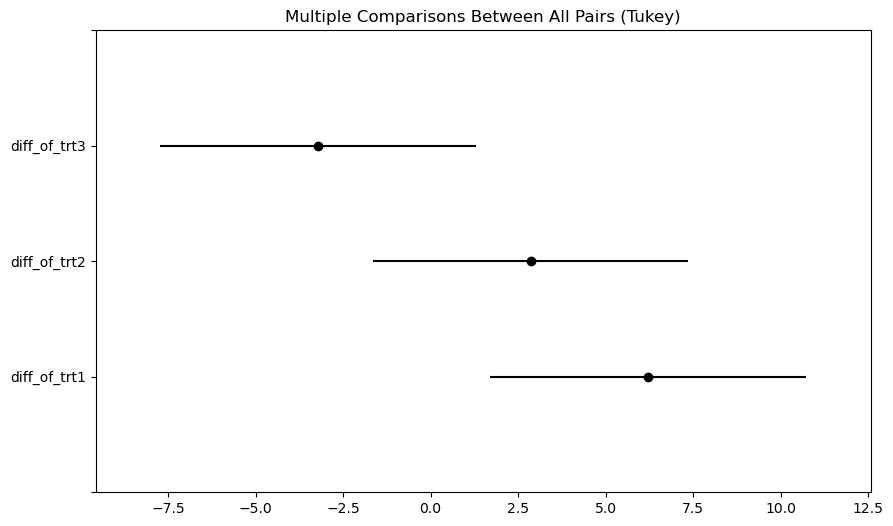

In [60]:
#One-Way ANOVA: Multiple Pairwise Comparisons-Tukey HSD test
mc = sm.stats.multicomp.MultiComparison(d_melt['value'],d_melt['treatments'])
mc_results = mc.tukeyhsd()
mc_results.plot_simultaneous()
print(mc_results)

For multiple pairwise comparisons, we consider modified significance:
As we have 3 groups significance values should be modified as 𝛼* = 𝛼/K, where K is the number of comparisons
𝛼* = 0.05/3 = 0.0167 = 0.01

In [65]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(d_melt['value'], d_melt['treatments'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method="bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
diff_of_trt1,diff_of_trt2,0.858,0.3987,1.0,False
diff_of_trt1,diff_of_trt3,2.3536,0.0264,0.0793,False
diff_of_trt2,diff_of_trt3,1.9446,0.0627,0.1881,False


In [67]:
    import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(d_melt['value'], d_melt['treatments'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "sidak")

tbl

group1,group2,stat,pval,pval_corr,reject
diff_of_trt1,diff_of_trt2,0.858,0.3987,0.7826,False
diff_of_trt1,diff_of_trt3,2.3536,0.0264,0.0772,False
diff_of_trt2,diff_of_trt3,1.9446,0.0627,0.1766,False


In [69]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(d_melt['value'], d_melt['treatments'])
post_hoc_res = comp.tukeyhsd()
post_hoc_res.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
diff_of_trt1,diff_of_trt2,-3.3571,0.6392,-12.3752,5.6609,False
diff_of_trt1,diff_of_trt3,-9.4286,0.0388,-18.4466,-0.4105,True
diff_of_trt2,diff_of_trt3,-6.0714,0.2412,-15.0895,2.9466,False


The Tukey HSD test is a statistical method that helps determine whether there is a significant difference between two sets of data.

In this case, the results of the Tukey HSD test indicate that there is a significant difference between the "diff_of_trt1" and "diff_of_trt 3" groups. However, for all other pairwise comparisons, the null hypothesis is rejected, indicating that there are no significant differences between those groups.

##### One-Way ANOVA: Assumptions checks


QQ plot

Histogram

shapiro Test

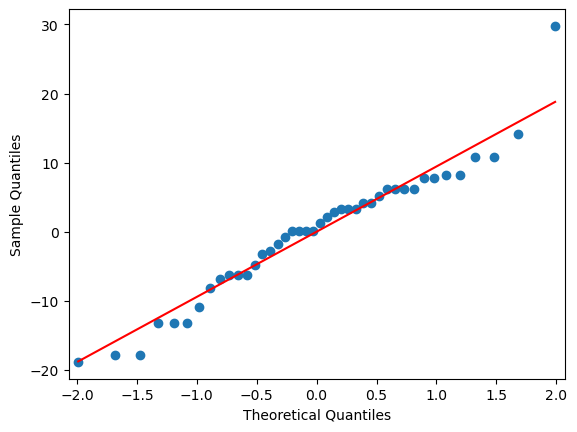

In [87]:
# One-Way ANOVA: Assumptions checks
# QQ plot
res = model.resid
fig = sm.qqplot(res,line='s')

From the Q-Q plot we can observe that the points plotted on the graph perfectly lies on a straight line then we can clearly say that this distribution is Normally distribution because it is evenly aligned with the standard normal variate which is the simple concept of Q-Q plot

<AxesSubplot:ylabel='Density'>

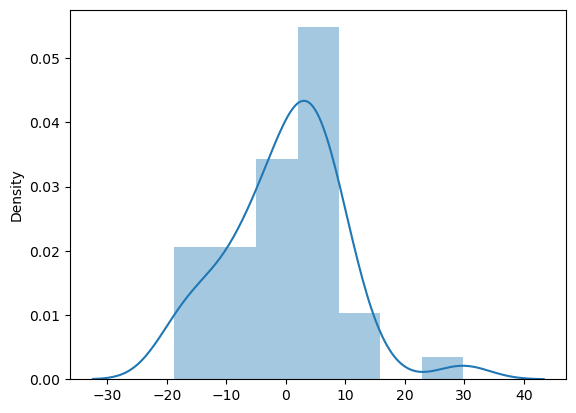

In [88]:
# Histogram
import seaborn as sns
sns.distplot(res,bins='auto',hist='True')

Seaborn plot allows the display of a histogram with a line. The histogram with a line can be visualized in multiple ways through the use of seaborn and matplotlib, which are powerful plotting modules in Python that can be used together.

<center><strong>Normality Assumption Check</strong></center>

<center><strong> Shapiro Test </strong></center>

In [89]:
# shapiro Test
from scipy import stats
w,pvalue = stats.shapiro(model.resid)
print('pvalue: ',pvalue)

pvalue:  0.11303776502609253


##### Homogenity conditions


<center><strong> Bartleet Test </strong></center>

In [90]:
#Bartleet Test
w,pvalue = stats.bartlett(d_melt['value'][d_melt['treatments']=='diff_of_trt1'],
                          d_melt['value'][d_melt['treatments']=='diff_of_trt2'],
                          d_melt['value'][d_melt['treatments']=='diff_of_trt3'])

print('Bartleet Test w:{:7.4f}, pvalue:{:7.4f}'.format(w,pvalue))

Bartleet Test w: 2.9050, pvalue: 0.2340


P_value is greater than 0.05 for Bartleet Test. So, we fail to reject null hypothesis.

<center><strong> Levene Variance Test Test </strong></center>

In [91]:
# Levene Variance Test
w,pvalue = stats.levene(d_melt[d_melt['treatments']=='diff_of_trt1']['value'].values,
                       d_melt[d_melt['treatments']=='diff_of_trt2']['value'].values,
                       d_melt[d_melt['treatments']=='diff_of_trt3']['value'].values)

print('Levene Test w:{:7.4f}, pvalue:{:7.4f}'.format(w,pvalue))

Levene Test w: 1.3961, pvalue: 0.2597


P_value is greaterthan 0.05 for Levene Variance Test. So, we fail to reject null hypothesis.

## Conclusion

From the ANOVA analysis, the p-value linked to the "treatments" factor stands at 0.046069. This value falls below the conventional significance threshold of 0.05, providing substantial evidence to reject the null hypothesis asserting equality of means among the treatment groups.

Within the post hoc comparison results, the p-values corresponding to specific pairwise comparisons between treatments are evident. Notably, the "diff_of_trt3 - diff_of_trt1" comparison yields a p-value, falling below the modified significance level of 0.017. This indicates a statistically significant difference between the means of "diff_of_trt3" and "diff_of_trt1."

Conducting Bartleet, Levene, and Shapiro-Wilk tests, the derived p-value from our ANOVA analysis is deemed significant. Consequently, we fail to reject the null hypothesis, indicating that the collected data adheres to a normal distribution and fulfills the assumption of homogeneity of variances.

In conclusion, based on both the overall ANOVA test and the post hoc comparisons, we reject the null hypothesis for the "treatments" factor overall, indicating that there are significant differences among at least some of the treatment groups.